In [1]:
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
import logomaker
import hdf5plugin
import h5py   

def get_model_score(file_path,sequence_number):
    import h5py
    # Open the HDF5 file
    with h5py.File(file_path, 'r') as f:
        # Access the dataset
        dataset = f['shap']['seq']
        
        # Convert dataset to a pandas DataFrame
        #get contribution_scores
        df = pd.DataFrame(dataset[sequence_number][:])
    
        # Access the dataset
        dataset = f['raw']['seq']
        
        # Convert dataset to a pandas DataFrame
        #get sequence
        df2 = pd.DataFrame(dataset[sequence_number][:])
    df3 = df*df2

    return(df3)
        

In [59]:
hits_unique = pd.read_csv("test_finemo/hits_unique.tsv",sep="\t")

In [60]:
#celltype = 'Goblet_cell'

celltype = 'enterocytes'
celltype = 'Goblet_cell'
celltype = 'enterocytes'

fold = 'fold_0'
NARROWPEAK_SCHEMA = ["chr", "start", "end", "peak_name", "2", "3", "4", "5", "6", "summit"]

regions_df = pd.read_csv("celltype_models_human/modelv1_"+celltype+"/fold_0/output/auxiliary/interpret_subsample/chrombpnet_nobias.interpreted_regions.bed", sep='\t', names=NARROWPEAK_SCHEMA)

seq_length = 2114
regions_df['int_start'] = regions_df['start']+regions_df['summit']-seq_length/2
regions_df['int_end'] = regions_df['start']+regions_df['summit']+seq_length/2

h5_file = 'celltype_models_human/modelv1_'+celltype+'/fold_0/output/auxiliary/interpret_subsample/chrombpnet_nobias.profile_scores.h5'

In [61]:
pattern = 'pos_patterns.pattern_21'
hits_pattern = hits_unique.loc[hits_unique['motif_name']==pattern].copy()
#hits_pattern = hits_pattern[hits_pattern['hit_importance']>0.1]

hits_pattern = hits_pattern[hits_pattern['hit_coefficient']>20]

start_name,end_name = 'start_untrimmed','end_untrimmed'
start_name,end_name = 'start','end'

start_name,end_name = 'start_untrimmed','end_untrimmed'
start_name,end_name = 'start','end'

j = 0
peaks = list(set(hits_pattern['peak_id']))
print(len(peaks))

for i in peaks:
    peak_scores = get_model_score(h5_file,i)
    hits_unique_pattern = hits_pattern.loc[hits_pattern['peak_id']==i].copy()
    x_score = 0
    if len(hits_unique_pattern.index)>0:
        for x in hits_unique_pattern.index:
            x_start, x_end,x_strand, x_peak  = hits_unique_pattern.loc[x,start_name],hits_unique_pattern.loc[x,end_name],hits_unique_pattern.loc[x,'strand'], hits_unique_pattern.loc[x,'peak_name']
            
            peak_start = list(regions_df.loc[regions_df['peak_name']==x_peak,'int_start'])[0]
            x_start = int(x_start-peak_start)
            x_end = int(x_end-peak_start)
            
            if x_strand == '+':
                x_score = peak_scores.iloc[:,x_start:x_end]
            if x_strand == '-':
                #take strand negative
                x_score = peak_scores.iloc[:,x_start:x_end]
                x_score = x_score.loc[:, ::-1]
                #switch to complement
                x_score = x_score.loc[[3,2,1,0]]
                x_score.index = [0,1,2,3]
            
            x_score.columns = range(0,x_end-x_start)

            if j == 0:
                pattern_summary = x_score
                j+=1
            else:
                pattern_summary = pattern_summary + x_score
                j+=1
            
print(j)
seq_df = pattern_summary
seq_df = seq_df.astype('float')
seq_df = seq_df.T
seq_df.columns = ['A','C','G','T']
seq_df[seq_df<0]=0

seq_df = seq_df/j

126
127


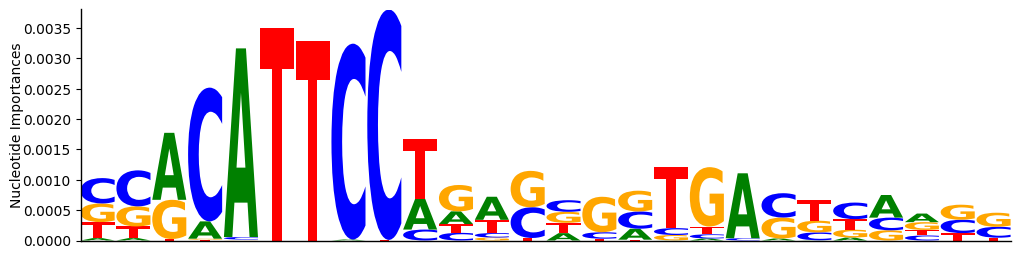

In [62]:
# create Logo object
import logomaker

crp_logo = logomaker.Logo(seq_df,figsize=(12, 3),
                          shade_below=0,
                          fade_below=0)

# style using Logo methods
crp_logo.style_spines(visible=False)
crp_logo.style_spines(spines=['left', 'bottom'], visible=True)
#crp_logo.style_xticks(rotation=90, fmt='%d', anchor=0)
crp_logo.ax.set_xticks([])

# style using Axes methods
crp_logo.ax.set_ylabel("Nucleotide Importances", labelpad=-1)
crp_logo.ax.xaxis.set_ticks_position('none')
crp_logo.ax.xaxis.set_tick_params(pad=-1)


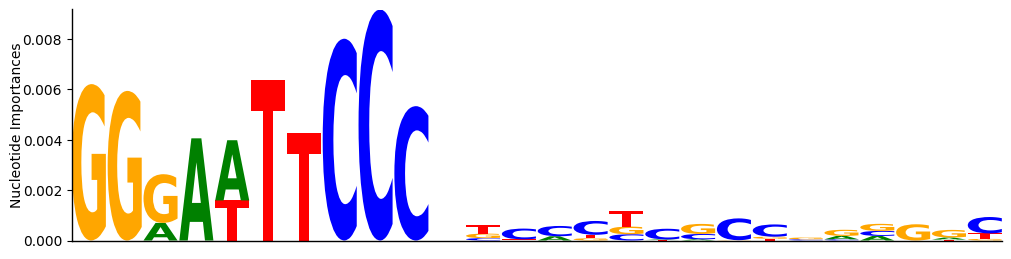

In [58]:
# create Logo object
import logomaker

crp_logo = logomaker.Logo(seq_df,figsize=(12, 3),
                          shade_below=0,
                          fade_below=0)

# style using Logo methods
crp_logo.style_spines(visible=False)
crp_logo.style_spines(spines=['left', 'bottom'], visible=True)
#crp_logo.style_xticks(rotation=90, fmt='%d', anchor=0)
crp_logo.ax.set_xticks([])

# style using Axes methods
crp_logo.ax.set_ylabel("Nucleotide Importances", labelpad=-1)
crp_logo.ax.xaxis.set_ticks_position('none')
crp_logo.ax.xaxis.set_tick_params(pad=-1)


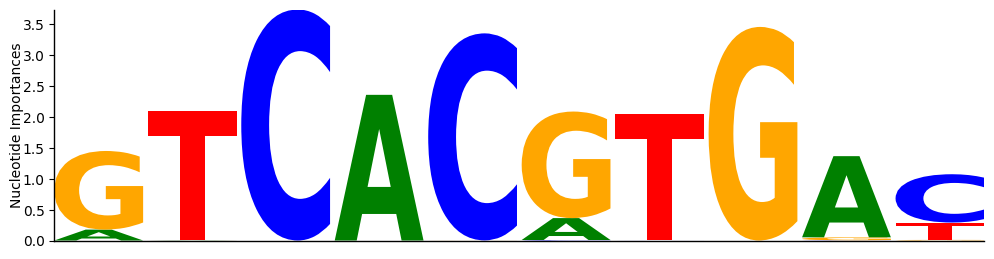

In [49]:
# create Logo object
import logomaker

crp_logo = logomaker.Logo(seq_df,figsize=(12, 3),
                          shade_below=0,
                          fade_below=0)

# style using Logo methods
crp_logo.style_spines(visible=False)
crp_logo.style_spines(spines=['left', 'bottom'], visible=True)
#crp_logo.style_xticks(rotation=90, fmt='%d', anchor=0)
crp_logo.ax.set_xticks([])

# style using Axes methods
crp_logo.ax.set_ylabel("Nucleotide Importances", labelpad=-1)
crp_logo.ax.xaxis.set_ticks_position('none')
crp_logo.ax.xaxis.set_tick_params(pad=-1)


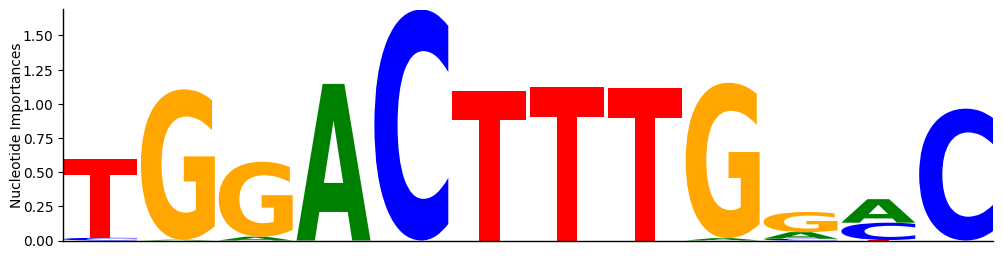

In [38]:
# create Logo object
import logomaker

crp_logo = logomaker.Logo(seq_df,figsize=(12, 3),
                          shade_below=0,
                          fade_below=0)

# style using Logo methods
crp_logo.style_spines(visible=False)
crp_logo.style_spines(spines=['left', 'bottom'], visible=True)
#crp_logo.style_xticks(rotation=90, fmt='%d', anchor=0)
crp_logo.ax.set_xticks([])

# style using Axes methods
crp_logo.ax.set_ylabel("Nucleotide Importances", labelpad=-1)
crp_logo.ax.xaxis.set_ticks_position('none')
crp_logo.ax.xaxis.set_tick_params(pad=-1)


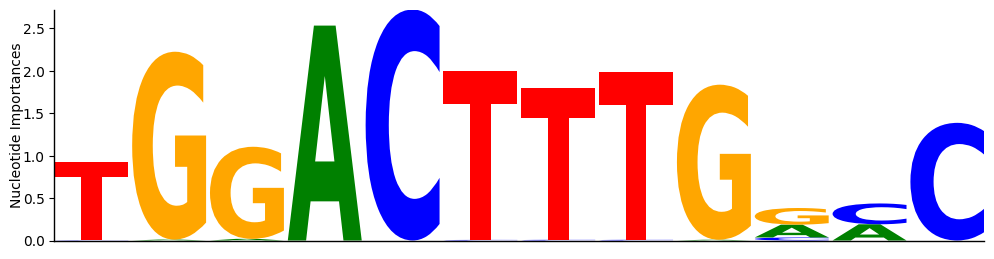

In [32]:
# create Logo object
import logomaker

crp_logo = logomaker.Logo(seq_df,figsize=(12, 3),
                          shade_below=0,
                          fade_below=0)

# style using Logo methods
crp_logo.style_spines(visible=False)
crp_logo.style_spines(spines=['left', 'bottom'], visible=True)
#crp_logo.style_xticks(rotation=90, fmt='%d', anchor=0)
crp_logo.ax.set_xticks([])

# style using Axes methods
crp_logo.ax.set_ylabel("Nucleotide Importances", labelpad=-1)
crp_logo.ax.xaxis.set_ticks_position('none')
crp_logo.ax.xaxis.set_tick_params(pad=-1)


In [14]:
hits_pattern

,chr,start,end,start_untrimmed,end_untrimmed,motif_name,hit_coefficient,hit_correlation,hit_importance,strand,peak_name,peak_id
691,chr12,6768169,6768181,6768160,6768190,pos_patterns.pattern_1,317.15433,0.932144,0.013756,+,human_peaks_peak_18337,11537
1038,chr12,11829760,11829772,11829751,11829781,pos_patterns.pattern_1,305.82825,0.954253,0.090091,+,human_peaks_peak_18508,20117
3118,chr12,48359387,48359399,48359378,48359408,pos_patterns.pattern_1,324.98148,0.929147,0.020794,+,human_peaks_peak_19439,23722
4257,chr12,57049114,57049126,57049105,57049135,pos_patterns.pattern_1,325.97733,0.955870,0.027937,+,human_peaks_peak_19954,9216
5682,chr12,84698794,84698806,84698785,84698815,pos_patterns.pattern_1,309.33690,0.948246,0.012246,+,human_peaks_peak_20675,15125
...,...,...,...,...,...,...,...,...,...,...,...,...
180407,chr14,74593529,74593541,74593520,74593550,pos_patterns.pattern_1,339.16666,0.958632,0.030414,+,human_peaks_peak_26232,19695
181237,chr14,91082447,91082459,91082438,91082468,pos_patterns.pattern_1,310.48935,0.964952,0.107212,-,human_peaks_peak_26650,12513
181680,chr14,94974597,94974609,94974588,94974618,pos_patterns.pattern_1,321.14853,0.928791,0.061196,-,human_peaks_peak_26848,26800
182643,chr22,18092148,18092160,18092139,18092169,pos_patterns.pattern_1,311.30783,0.970546,0.103583,+,human_peaks_peak_52601,4177
